# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)





In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

Problem 4: Life in Lower Dimensions

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA clustering the images in this reduced space.

Run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.

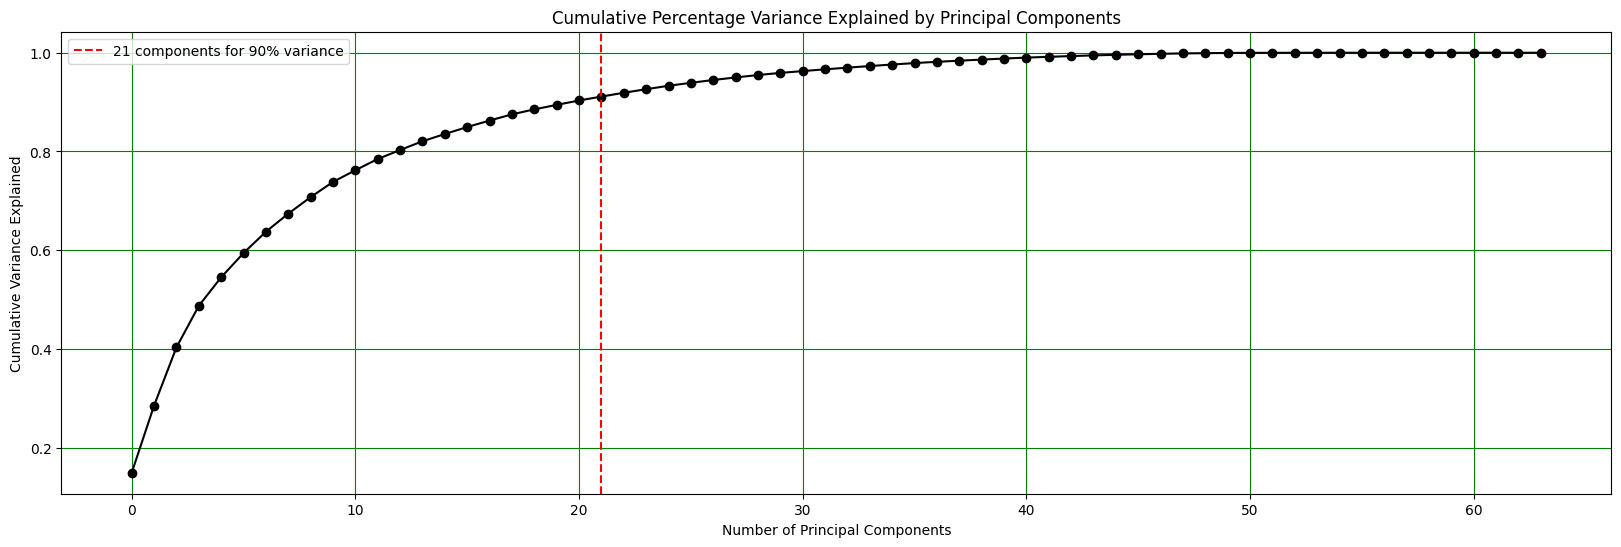

Total number of PCs that contribute to 90% variance: 21
(1797, 64)


In [10]:
# Cell type : CodeWrite
# write the function for PCA clustering here.

def compute_mean(Data):
    N = Data.shape[0] # no of data points
    D = Data.shape[1] # no of features 
    mean = np.zeros(D)
    for d in range(D):
        sum = 0
        for n in range(N):
            sum += data[n,d]
        mean[d] = sum /N
    return mean

def compute_covariance_matrix(Data):
    N = Data.shape[0] # no of data points
    D = Data.shape[1] # no of features 
    covariance_matrix = np.zeros((D, D))  # Dim : DXD i.e feature 1 correlation with feature 1,2,3...D.
    for i in range(D):
        # fetch feature i and its mean
        feature_i = data[:, i]
        mean_i = np.mean(feature_i)
        for j in range(D):
            # fetch feature j and its mean
            feature_j = data[:, j]
            mean_j = np.mean(feature_j)
            # compute cov(x,y) = (1/(N-1))(∑(x - x_mean)(y - y_mean))
            covariance_matrix[i, j] = np.sum((feature_i - mean_i) * (feature_j - mean_j)) / (N - 1)
    return covariance_matrix

def eigenValue_and_eigenVector(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort Eigen Value in decending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices] # 64 Eigen values - D
    eigenvectors = eigenvectors[:, sorted_indices] # 64 Eigen Vectors - D X D
    return eigenvalues, eigenvectors

def PCA(Data):
    """ Computes the likelihood score of a data point with respect to a given class
    given the class' mean and covariance matrix

    Arguments:
    Data: Dataset

    Returns:
    numPCs: number of principal components that contribute to 90% of the varaince in the dataset.

    """


    # 1)MEAN-SUBTRACTED IMAGE SET
    Data = Data - compute_mean(Data)
    
    # 2)COMPUTE COVARAINCE MATRIX
    covariance_matrix = compute_covariance_matrix(Data)
    
    # 3)COMPUTE EIGEN VALUE AND EIGEN VECTORS
    eigenvalues, eigenvectors = eigenValue_and_eigenVector(covariance_matrix)
        
    # 4)Explained Variance ratio .i.e varaince/total_variance --> eigen_value/sum of all eigen value
    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance
    
    
    # Goal:Count total number of PCs which have more than 90% variance 
    numPCs = 0
    cumulative_sum = 0
    cum_var_list = [] 
    for explained_var in explained_variance_ratio:
        cumulative_sum += explained_var
        numPCs += 1
        if cumulative_sum >= 0.90:
            break
    
    # Plot: Cumulative percentage variance explained by Principal Components
    
    cum_var_list = np.cumsum(explained_variance_ratio)
    x = numPCs
    plt.figure(figsize=(20, 6))
    plt.plot(cum_var_list, marker='o', linestyle='-', color='black')
    plt.title('Cumulative Percentage Variance Explained by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.axvline(x=x, color='r', linestyle='--', label=f'{x} components for 90% variance')
    plt.legend(loc='best')
    plt.grid(color='green')
    plt.show()


    return numPCs
    
data = np.load('arr_0.npy') # N X D
n = PCA(data)
print(f'Total number of PCs that contribute to 90% variance: {n}')
print(data.shape)

4b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

In [40]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.


def projection(data,V):
    
    # Compute [Z = XV] where X is N X D and V is D X M so resultant would be (N X M) matrix
    N, D = data.shape
    D, M = V.shape
    Z = np.zeros((N, M))  # Create an empty matrix to store the projected data
    
    # Matrix Mulitplication
    for i in range(N):
        for j in range(M):
            dot_product = 0
            for k in range(D):
                dot_product += data[i, k] * top_eigenvectors[k, j]
            Z[i, j] = dot_product

    return Z

    

def dataReconstruction(data, dim):
    
    # Center the data to origin
    data = data - compute_mean(data)
    covariance_matrix = compute_covariance_matrix(data)
    # Get upto M-dimension or M PC's component
    eigenvalues, eigenvectors = eigenValue_and_eigenVector(covariance_matrix)

    # Select the top 'dim' eigenvectors
    top_M_eigenvectors = eigenvectors[:, :dim]

    # Project the data onto the M-dimensional space
    Z = np.dot(data, top_M_eigenvectors)

    
    # Reconstruct the data by projecting it back into the original data using X' = ZV^T = (XV)V^T {V*V^T = I so we carefully multiplied this!!!!}
    # Compute [Z*V^T] i.e. Z: N X M and V^T: M X D --> resultant: N X D 
    N, D = data.shape
    N, M = Z.shape
    reconstructed_data = np.zeros((N, D))
    
    # Compute Matrix Multiplication 
    for i in range(N):
        for j in range(D):
            dot_product = 0
            for k in range(M):
                dot_product += Z[i, k] * top_M_eigenvectors[j, k]
            reconstructed_data[i, j] = dot_product

    # Add mean to get back to the original position in affine space
    reconstructed_data = reconstructed_data + compute_mean(data)
    
    return reconstructed_data


# OPTIMAL DIMENSION 

def optimal_dimension(mse, dim):
    idx = np.argmin(mse)
    return dim[idx]

# Given Dimensions
dimensions = [2, 4, 8, 16]
# MSE Value List
mse_values = []

for d in dimensions:
   
    # Projection of data on following PC's component
    reconstructed_data = dataReconstruction(data, d)
    # Calculate MSE
    mse = np.mean(np.square(data - reconstructed_data))
    mse_values.append(mse)
    



for i, dim in enumerate(dimensions):
    print(f'MSE for d={dim}: {mse_values[i]}')
    
# Optimal Dimension
d = optimal_dimension(mse_values, dimensions)
print(f'Optimal dimensions 𝑑̂ based on the MSE values is {d}')

MSE for d=2: 13.42101220076145
MSE for d=4: 9.627986407129212
MSE for d=8: 6.121792751796508
MSE for d=16: 2.827182863396541
Optimal dimensions 𝑑̂ based on the MSE values is 16


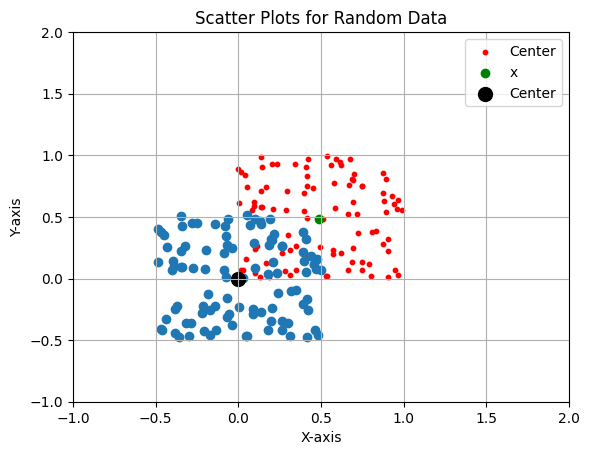